<a href="https://www.kaggle.com/code/dipeshthashrestha/classwork-leedcode?scriptVersionId=201894697" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
#import all the required libraries for ML operations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
Leed_df = pd.read_csv('/kaggle/input/leetcode-questions-dataset/Leetcode_Questions.csv')

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/leetcode-questions-dataset/Leetcode_Questions.csv


In [4]:
Leed_df.head()

,Question_No,Question,Acceptance,isPremium,Difficulty,Question_Link,Solution
0,1,Two Sum,53.80%,False,Easy,https://leetcode.com/problems/two-sum/description,https://leetcode.com/problems/two-sum/solutions
1,2,Add Two Numbers,44.10%,False,Medium,https://leetcode.com/problems/add-two-numbers/...,https://leetcode.com/problems/add-two-numbers/...
2,3,Longest Substring Without Repeating Characters,35.40%,False,Medium,https://leetcode.com/problems/longest-substrin...,https://leetcode.com/problems/longest-substrin...
3,4,Median of Two Sorted Arrays,41.50%,False,Hard,https://leetcode.com/problems/median-of-two-so...,https://leetcode.com/problems/median-of-two-so...
4,5,Longest Palindromic Substring,34.40%,False,Medium,https://leetcode.com/problems/longest-palindro...,https://leetcode.com/problems/longest-palindro...


In [5]:
Leed_df.describe()

,Question_No
count,2913.000000
mean,1612.115002
std,944.482382
min,1.000000
25%,805.000000
50%,1588.000000
75%,2431.000000
max,3250.000000


In [6]:
Leed_df.columns

Index(['Question_No', 'Question', 'Acceptance', 'isPremium', 'Difficulty',
       'Question_Link', 'Solution'],
      dtype='object')

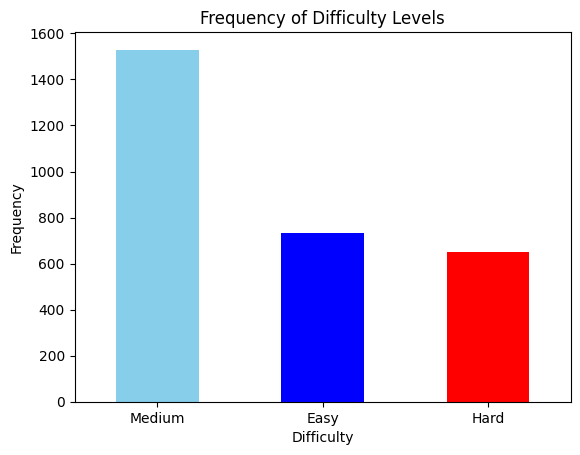

In [7]:
#Bar Chart for Difficulty Level Frequency:
import matplotlib.pyplot as plt

Leed_df['Difficulty'].value_counts().plot(kind='bar', color=['skyblue', 'blue', 'red'])  # Specify colors for each bar
plt.title('Frequency of Difficulty Levels')
plt.xlabel('Difficulty')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

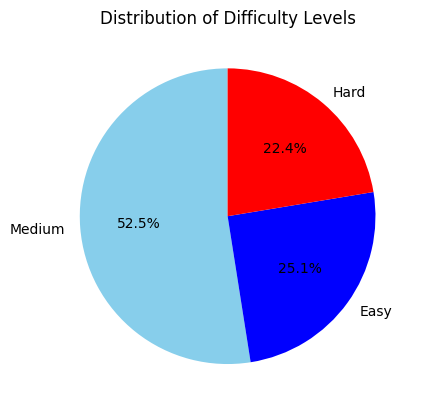

In [8]:
import matplotlib.pyplot as plt

difficulty_counts = Leed_df['Difficulty'].value_counts()
plt.pie(difficulty_counts, labels=difficulty_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'blue', 'red'])
plt.title('Distribution of Difficulty Levels')
plt.show()

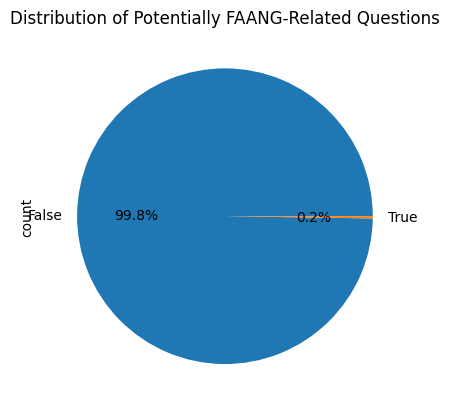

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Define a list of keywords or phrases related to FAANG companies
faang_keywords = ['Google', 'Amazon', 'Facebook', 'Apple', 'Netflix', 
                   'system design', 'distributed systems', 'machine learning', 
                   'big data', 'cloud computing']  # Add more relevant keywords

# Create a new column 'faang_related' based on keyword presence
Leed_df['faang_related'] = Leed_df['Question'].str.contains('|'.join(faang_keywords), case=False)

# Convert to categorical
Leed_df['faang_related'] = pd.Categorical(Leed_df['faang_related'])

# Generate pie chart
Leed_df['faang_related'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Potentially FAANG-Related Questions')
plt.show()

   Question_No                                         Question Acceptance  \
0            1                                          Two Sum     53.80%   
1            2                                  Add Two Numbers     44.10%   
2            3   Longest Substring Without Repeating Characters     35.40%   
3            4                      Median of Two Sorted Arrays     41.50%   
4            5                    Longest Palindromic Substring     34.40%   

   isPremium Difficulty                                      Question_Link  \
0      False       Easy  https://leetcode.com/problems/two-sum/description   
1      False     Medium  https://leetcode.com/problems/add-two-numbers/...   
2      False     Medium  https://leetcode.com/problems/longest-substrin...   
3      False       Hard  https://leetcode.com/problems/median-of-two-so...   
4      False     Medium  https://leetcode.com/problems/longest-palindro...   

                                            Solution faang_rel

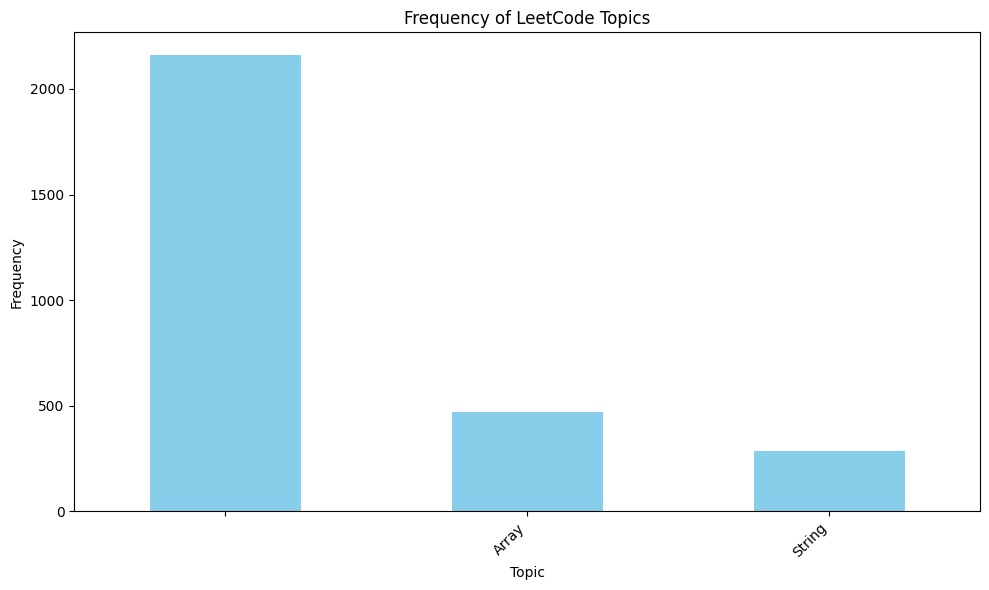

In [10]:
import pandas as pd

# Define keywords for common topics
topic_keywords = {
    'Array': ['array', 'list', 'matrix'],
    'String': ['string', 'substring', 'palindrome'],
    # ... add more topics and keywords
}

# Create a new column 'Topic' to store the extracted topics
Leed_df['Topic'] = ''  # Initialize as empty strings

# Iterate through the DataFrame and assign topics based on keywords
for index, row in Leed_df.iterrows():
    question_text = row['Question'].lower()
    for topic, keywords in topic_keywords.items():
        if any(keyword in question_text for keyword in keywords):
            Leed_df.loc[index, 'Topic'] = topic  # Assign the topic
            break  # Move to the next question

# Now you have a 'Topic' column to use for visualizations
print(Leed_df.head())  # Check the updated DataFrame

# Assuming you have a 'Topic' column in your DataFrame (Leed_df)
# with the extracted topics

# Group by 'Topic' and count the frequency of each topic
topic_counts = Leed_df['Topic'].value_counts()

# Create the bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
topic_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of LeetCode Topics')
plt.xlabel('Topic')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [11]:
for column in Leed_df.select_dtypes(include=['object']):
       print(Leed_df[column].value_counts())

Question
Two Sum                                    1
Maximum Split of Positive Even Integers    1
Count Integers With Even Digit Sum         1
Merge Nodes in Between Zeros               1
Construct String With Repeat Limit         1
                                          ..
Previous Permutation With One Swap         1
Distant Barcodes                           1
Shortest Way to Form String                1
Confusing Number                           1
Find the Count of Monotonic Pairs I        1
Name: count, Length: 2913, dtype: int64
Acceptance
62.50%    13
65.30%    12
43.90%    12
57.30%    11
61.20%    11
          ..
31.50%     1
18.00%     1
35.20%     1
89.60%     1
14.40%     1
Name: count, Length: 676, dtype: int64
Difficulty
Medium    1529
Easy       732
Hard       652
Name: count, dtype: int64
Question_Link
https://leetcode.com/problems/two-sum/description                                    1
https://leetcode.com/problems/maximum-split-of-positive-even-integers/descriptio

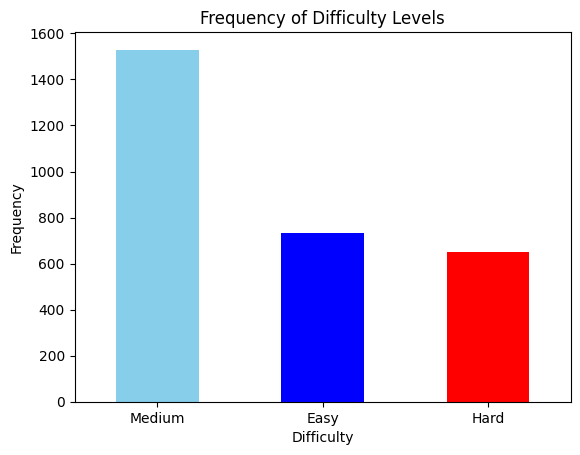

In [12]:
import matplotlib.pyplot as plt

# Assuming 'Difficulty' column exists in your DataFrame (Leed_df)
Leed_df['Difficulty'].value_counts().plot(kind='bar', color=['skyblue', 'blue', 'red'])
plt.title('Frequency of Difficulty Levels')
plt.xlabel('Difficulty')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.show()

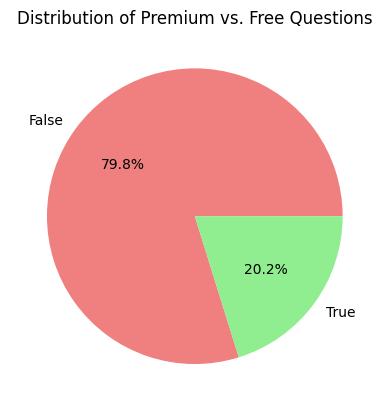

In [13]:
import matplotlib.pyplot as plt

# Assuming 'isPremium' column exists in your DataFrame (Leed_df)
Leed_df['isPremium'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
plt.title('Distribution of Premium vs. Free Questions')
plt.ylabel('')  # Remove the default y-axis label
plt.show()

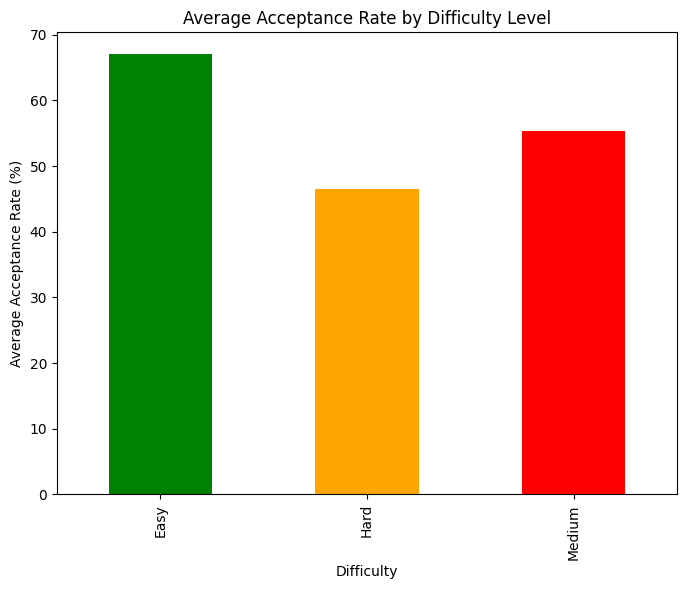

In [14]:
Leed_df['Acceptance'] = Leed_df['Acceptance'].str.replace('%', '').astype(float)

import matplotlib.pyplot as plt
import pandas as pd

# Calculate the average acceptance rate for each difficulty level
acceptance_by_difficulty = Leed_df.groupby('Difficulty')['Acceptance'].mean()

# Create a bar chart
plt.figure(figsize=(8, 6))  # Set the figure size
acceptance_by_difficulty.plot(kind='bar', color=['green', 'orange', 'red'])  # Plot the bar chart with specified colors
plt.title('Average Acceptance Rate by Difficulty Level')  # Set the title
plt.xlabel('Difficulty')  # Set the x-axis label
plt.ylabel('Average Acceptance Rate (%)')  # Set the y-axis label
plt.show()  # Display the chart

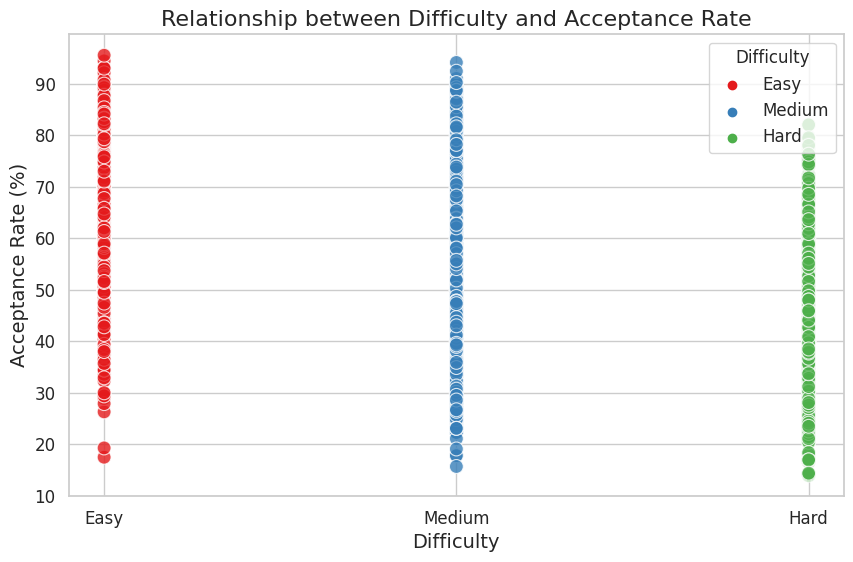

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot
sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(10, 6))  # Set the figure size
scatter = sns.scatterplot(x='Difficulty', y='Acceptance', data=Leed_df, hue='Difficulty', 
                          palette='Set1', s=100, alpha=0.8, edgecolor='w')

# Add title and labels
plt.title('Relationship between Difficulty and Acceptance Rate', fontsize=16)  # Set the title
plt.xlabel('Difficulty', fontsize=14)  # Set the x-axis label
plt.ylabel('Acceptance Rate (%)', fontsize=14)  # Set the y-axis label

# Increase the legibility of the legends
plt.xticks(fontsize=12)  # Set the font size of x-axis ticks
plt.yticks(fontsize=12)  # Set the font size of y-axis ticks

# Display the chart
plt.legend(title='Difficulty', fontsize=12)  # Display the legend with title and font size
plt.show()  # Show the plot

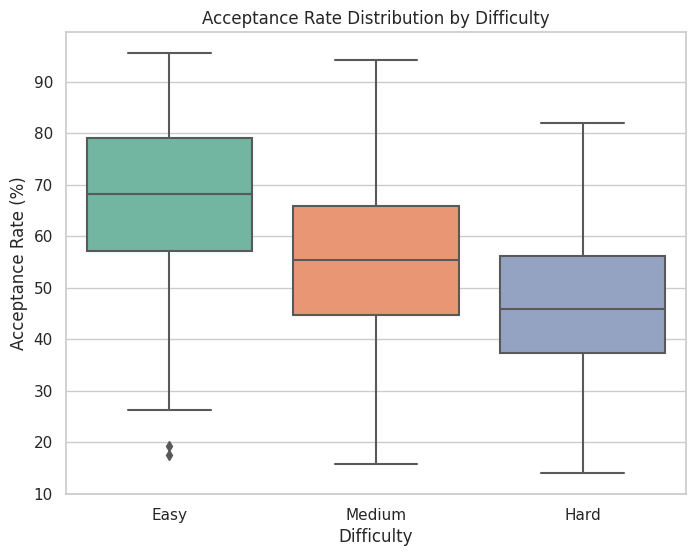

In [16]:
# Box Plot: Acceptance Rate by Difficulty
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.boxplot(x='Difficulty', y='Acceptance', data=Leed_df, palette='Set2')
plt.title('Acceptance Rate Distribution by Difficulty')
plt.xlabel('Difficulty')
plt.ylabel('Acceptance Rate (%)')
plt.show()

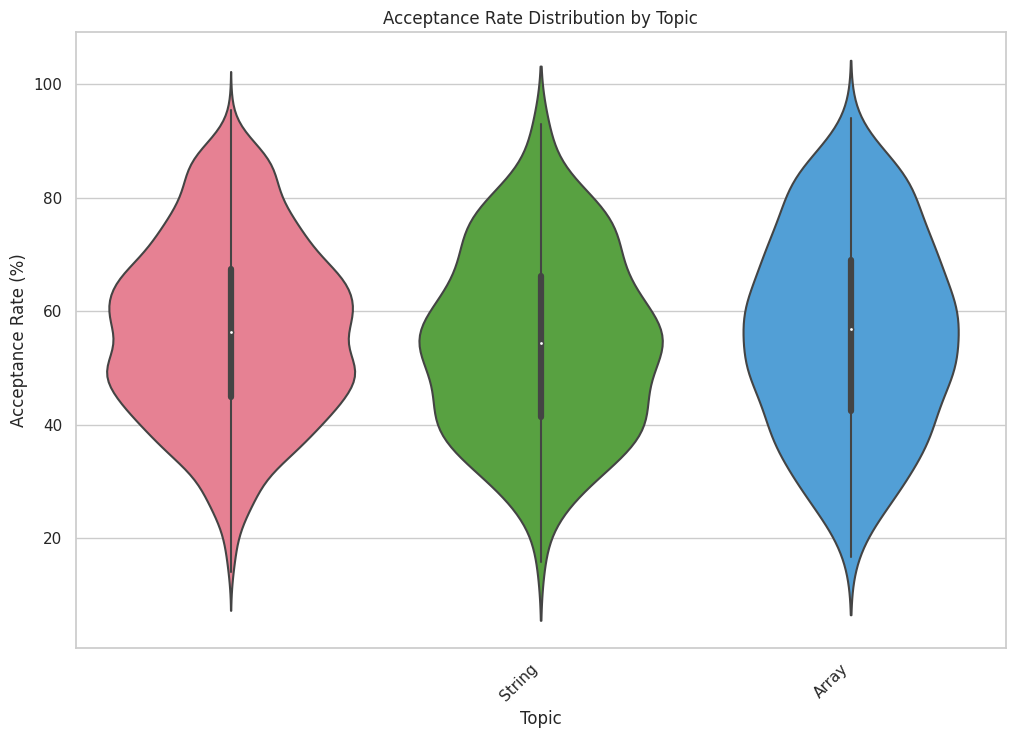

In [17]:
#Violin Plot: Acceptance Rate by Topic (if you have a 'Topic' column)
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.violinplot(x='Topic', y='Acceptance', data=Leed_df, palette='husl')
plt.title('Acceptance Rate Distribution by Topic')
plt.xlabel('Topic')
plt.ylabel('Acceptance Rate (%)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()

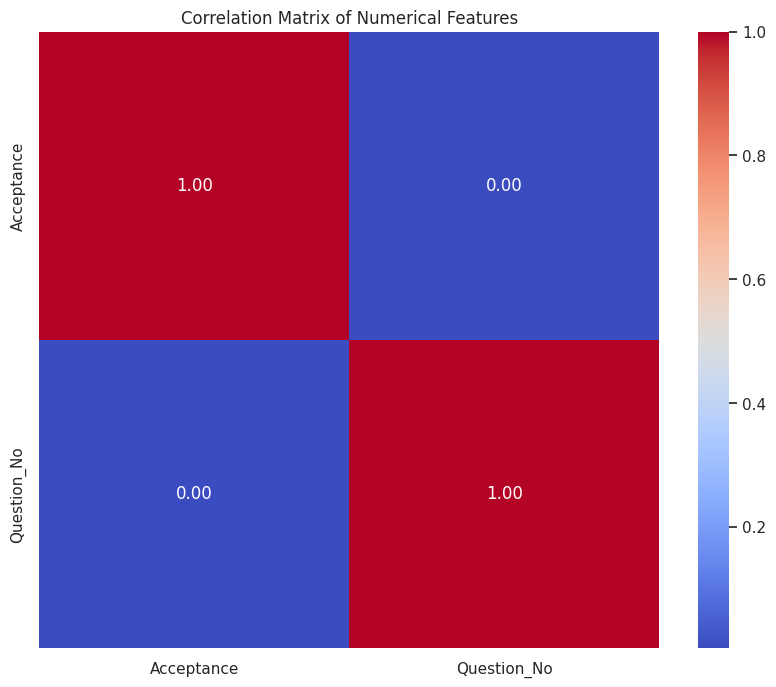

In [18]:

#Heatmap: Correlation Matrix of Numerical Features
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Select numerical features for correlation analysis
# Replace 'Frequency', 'Other_Numerical_Feature' with actual column names from your DataFrame
# The error was caused by using placeholder column names ('Column1', 'Column2')
# Replace these with your actual numerical column names

# Exclude 'Difficulty' since it's categorical
numerical_features = ['Acceptance', 'Question_No']  

# Convert 'Difficulty' to numerical representation if needed
# For example, using pd.factorize() or creating a mapping dictionary
# difficulty_mapping = {'Easy': 1, 'Medium': 2, 'Hard': 3}
# Leed_df['Difficulty_Num'] = Leed_df['Difficulty'].map(difficulty_mapping)
# numerical_features.append('Difficulty_Num')  

correlation_matrix = Leed_df[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

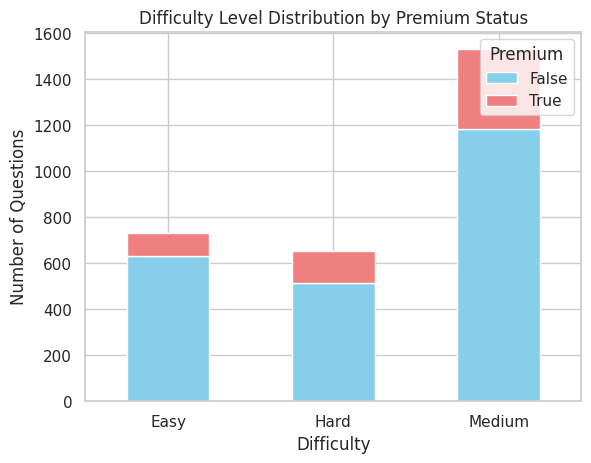

In [19]:
#Stacked Bar Chart: Difficulty Level Distribution by Premium Status
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'Difficulty' and 'isPremium' columns exist
difficulty_premium = Leed_df.groupby(['Difficulty', 'isPremium'])['Question_No'].count().unstack()

difficulty_premium.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'])
plt.title('Difficulty Level Distribution by Premium Status')
plt.xlabel('Difficulty')
plt.ylabel('Number of Questions')
plt.xticks(rotation=0)
plt.legend(title='Premium', loc='upper right')
plt.show()

#This visualization shows the distribution of difficulty levels for both premium and free questions using a stacked bar chart. It helps compare the proportion of easy, medium, and hard questions within each premium status category.

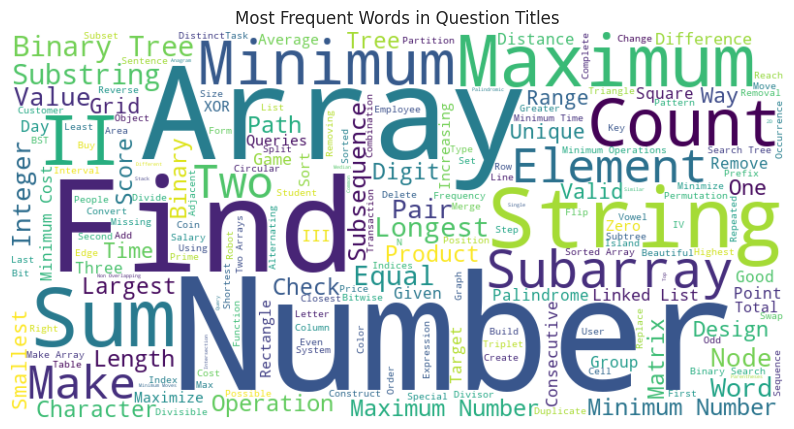

In [20]:
#Word Cloud: Most Frequent Words in Question Titles
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'Question' column exists
all_questions = ' '.join(Leed_df['Question'].astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_questions)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Question Titles')
plt.show()
# If you have a column containing question titles or descriptions, this visualization creates a word cloud to show the most frequent words in those texts. It can help identify common themes or keywords associated with LeetCode questions.

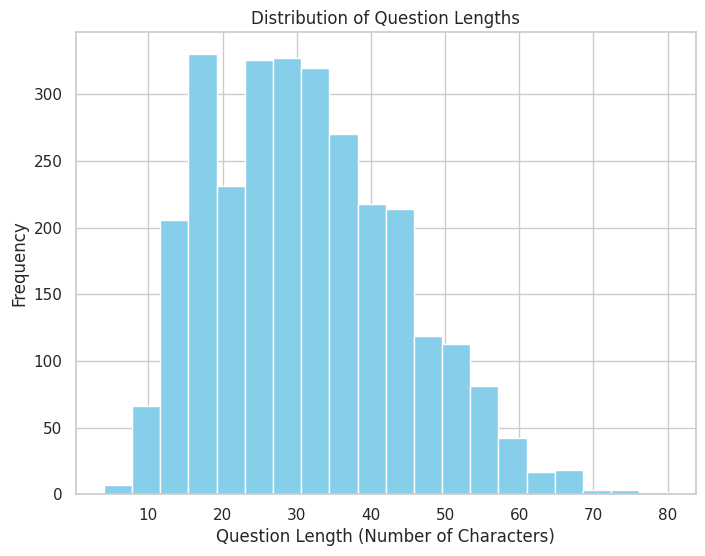

In [21]:

#Histogram Distribution of Question Lengths
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a 'Question' column
Leed_df['Question_Length'] = Leed_df['Question'].apply(len)

plt.figure(figsize=(8, 6))
plt.hist(Leed_df['Question_Length'], bins=20, color='skyblue')
plt.title('Distribution of Question Lengths')
plt.xlabel('Question Length (Number of Characters)')
plt.ylabel('Frequency')
plt.show()
#This histogram shows the distribution of question lengths based on the number of characters. It can reveal if there's a typical length for LeetCode questions or if there's a wide variation.

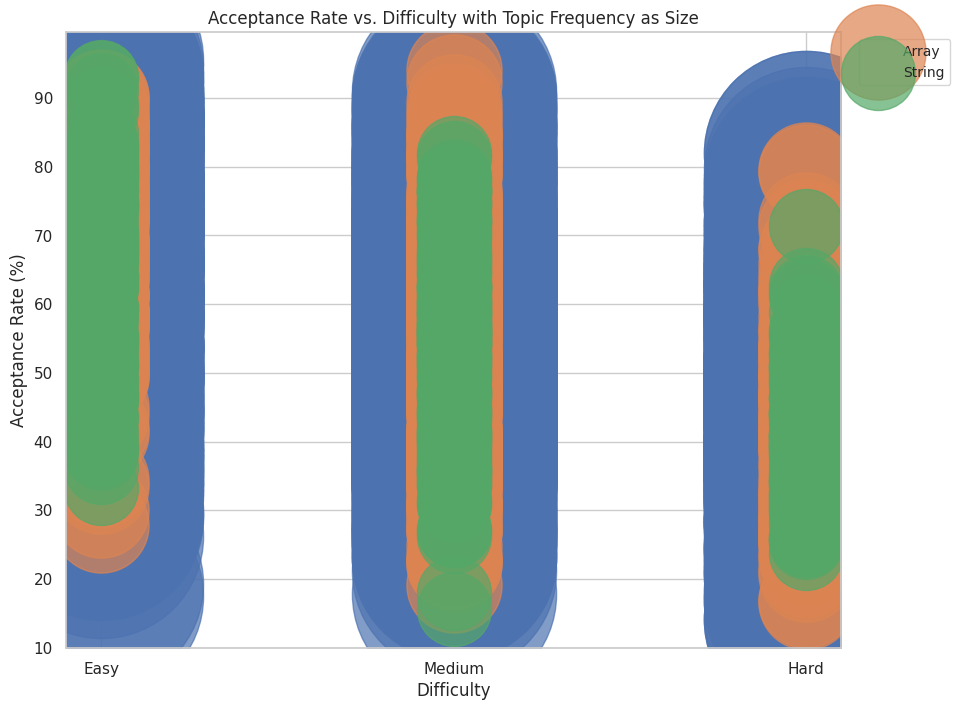

In [22]:
#Bubble Chart: Acceptance Rate vs. Difficulty with Topic Frequency as Size
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have 'Difficulty', 'Acceptance', and 'Topic' columns
topic_frequency = Leed_df['Topic'].value_counts()

plt.figure(figsize=(10, 8))
for topic, frequency in topic_frequency.items():
    subset = Leed_df[Leed_df['Topic'] == topic]
    plt.scatter(subset['Difficulty'], subset['Acceptance'], s=frequency * 10, 
                alpha=0.7, label=topic)

plt.title('Acceptance Rate vs. Difficulty with Topic Frequency as Size')
plt.xlabel('Difficulty')
plt.ylabel('Acceptance Rate (%)')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1), fontsize='small')
plt.show()
#This bubble chart visualizes the relationship between acceptance rate and difficulty, with the size of the bubbles representing the frequency of each topic. It provides a more comprehensive view of the data, highlighting topics that are more common or have interesting patterns.

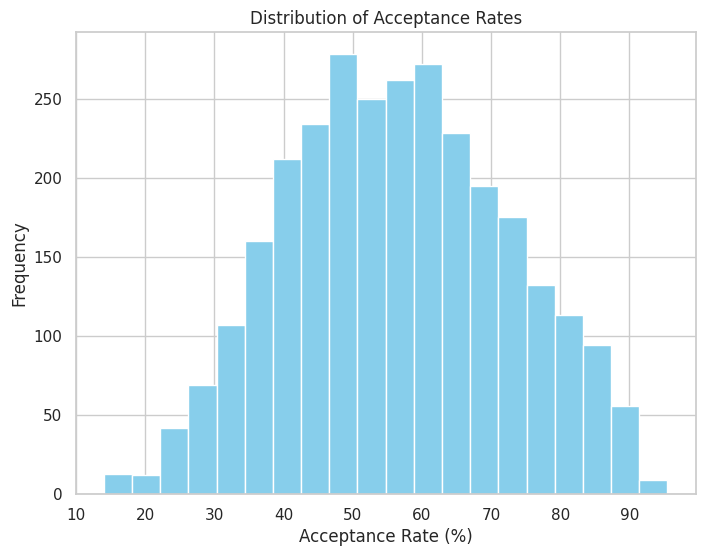

In [23]:

#Histogram: Acceptance Rate Distribution
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(8, 6))
plt.hist(Leed_df['Acceptance'], bins=20, color='skyblue')
plt.title('Distribution of Acceptance Rates')
plt.xlabel('Acceptance Rate (%)')
plt.ylabel('Frequency')
plt.show()
#This histogram shows the distribution of acceptance rates for all questions in the dataset. It helps understand the range of acceptance rates and how frequently different rates occur.